## IIITB-UpGrad DS-C61 Submission - April 2024 - Lead Scoring Case Study
### Submitted by - Prathamesh Kulkarni

### STEP 1: IMPORTING DATA

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing seaborn and matplotlib.pyplot for visualisation

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing dataset
leads = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### STEP 2: DATASET INSPECTION

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
## There are many columns which have null values.
## Before beginning null treatment, let's find which column can be used as index
## Let's check 'Prospect ID' and 'Lead Number' columns. If either of these has unique values, we can use that as index

In [9]:
leads["Prospect ID"].nunique()

9240

In [10]:
leads["Lead Number"].nunique()

9240

In [11]:
## Since both of these columns hold unique values, let's drop one column and use another as index
## We will drop 'Prospect ID' and keep 'Lead Number'

In [12]:
leads = leads.drop(['Prospect ID'], axis=1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
## Resetting index...

leads = leads.set_index('Lead Number')
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
## Now, let's check NULL values in leads dataset

leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677

In [15]:
## Calculating percentage of null values in each column...

leads.isnull().sum()/len(leads)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### STEP 3: DATA PREPARATION

In [16]:
## Let's consider the threshold of 1.5%
## We will drop the observations having null values in the columns for which less than 1.5% of the total data is missing

## Following columns have less than 1.5% null values...
## Lead Source, TotalVisits, Page Views Per Visit and Last Activity

leads.dropna(subset=['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'], inplace=True)

In [17]:
## Check null value percentage again...

leads.isnull().sum()/len(leads)*100

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                          25.303064
Specialization                                   15.770333
How did you hear about X Education               24.245096
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [18]:
## Let's check each of remaining columns with null values individually...

## Starting with 'Country'... checking value counts to see relevance of this column in this analysis...

leads['Country'].value_counts()

Country
India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [19]:
leads['Country'].value_counts()/len(leads['Country'])*100

Country
India                   71.534053
United States            0.760414
United Arab Emirates     0.584086
Singapore                0.264492
Saudi Arabia             0.231430
United Kingdom           0.165307
Australia                0.143266
Qatar                    0.110205
Hong Kong                0.077143
Bahrain                  0.077143
Oman                     0.066123
France                   0.066123
unknown                  0.055102
South Africa             0.044082
Nigeria                  0.044082
Germany                  0.044082
Kuwait                   0.044082
Canada                   0.044082
Sweden                   0.033061
China                    0.022041
Asia/Pacific Region      0.022041
Uganda                   0.022041
Bangladesh               0.022041
Italy                    0.022041
Belgium                  0.022041
Netherlands              0.022041
Ghana                    0.022041
Philippines              0.022041
Russia                   0.011020
Switze

In [20]:
## Since approx 97% of values in 'Country' column are either NULL or 'India', this column becomes statistically insignificant (71.5% with value 'India' and 25.3% NULL)

## Thus, we will drop this column

leads = leads.drop(['Country'], axis=1)

In [21]:
## Let's look at 'Specialization' column

leads['Specialization'].value_counts()

Specialization
Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [22]:
## Most values in 'Specialization' column are either NULL (15.77%) or 'Select'..

## The value 'Select' means that the field was left blank by the person who filled the web-form

## We cannot drop this column, because it can be significant for this leads analysis from business perspective

## We can replace both - NULL and 'Select' - values with a new value - 'Unselected' - for clarity and ease of understanding

## In further steps, we are going to create dummy variables for this categorical column

leads['Specialization'].replace(to_replace='Select', value='Unselected', inplace=True)
leads['Specialization'].fillna('Unselected', inplace=True)

In [23]:
leads['Specialization'].value_counts()

Specialization
Unselected                           3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [24]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unselected,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unselected,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unselected,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [25]:
## Let's move to the next column having large percentage of NULL values --> "How did you hear about X Education"

leads["How did you hear about X Education"].value_counts()

How did you hear about X Education
Select                   4886
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: count, dtype: int64

In [26]:
## We can treat the values in the above column in the same way as we did for 'Specialization' column

leads['How did you hear about X Education'].replace(to_replace='Select', value='Unselected', inplace=True)
leads['How did you hear about X Education'].fillna('Unselected', inplace=True)

In [27]:
leads["How did you hear about X Education"].value_counts()

How did you hear about X Education
Unselected               7086
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: count, dtype: int64

In [28]:
## Let's move to the next column having large percentage of NULL values --> "What is your current occupation"

leads["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

In [29]:
## Since large number of values in this column are either 'Unemployed' or NULL, it would make sense to impute NULL values with value 'Unemployed'

leads['What is your current occupation'].fillna('Unemployed', inplace=True)

In [30]:
leads["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

In [31]:
# Let's move to the next column having large percentage of NULL values --> "What matters most to you in choosing a course"

leads["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

In [32]:
## Again, since one of the values occurs more than 99% times, we can safely impute NULL values in this other column with the value most frequently occurring

leads['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

In [33]:
leads["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

In [34]:
# Let's move to the next column having large percentage of NULL values --> 'Tags'

leads["Tags"].value_counts()

Tags
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to O

In [35]:
## Since the tags could be significant from business perspective, we can keep this column (not dropping)

## We can impute all rows with NULL value in 'Tags' column with value 'Untagged' for clarity purpose

leads['Tags'].fillna('Untagged', inplace=True)

In [36]:
leads["Tags"].value_counts()

Tags
Untagged                                             3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch 

In [37]:
# Let's move to the next column having large percentage of NULL values --> 'Lead Quality'

leads['Lead Quality'].value_counts()

Lead Quality
Might be             1519
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: count, dtype: int64

In [38]:
## Again, since the values in this column could be significant from business perspective to determine good leads, we will keep this column

## Imputing null values with MODE of this column's values

leads['Lead Quality'].fillna(leads['Lead Quality'].mode()[0], inplace=True)

In [39]:
leads['Lead Quality'].value_counts()

Lead Quality
Might be             6239
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: count, dtype: int64

In [40]:
# Let's move to the next column having large percentage of NULL values --> 'Lead Profile'

leads['Lead Profile'].value_counts()

Lead Profile
Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: count, dtype: int64

In [41]:
## The case with this column is same as before... the person who filled the form probably left this field on the web-form blank (did not select value from drop-down)

## Let's replace 'Select' with a new value 'Unselected' and also impute NULL values with value 'Unselected'

leads['Lead Profile'].replace(to_replace='Select', value='Unselected', inplace=True)
leads['Lead Profile'].fillna('Unselected', inplace=True)

In [42]:
leads['Lead Profile'].value_counts()

Lead Profile
Unselected                     6757
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: count, dtype: int64

In [43]:
## Before moving to the next column having large number of NULL values, let's check NULL percentage of all columns again...

leads.isnull().sum()/len(leads)*100

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Specialization                                    0.000000
How did you hear about X Education                0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [44]:
# Let's move to the next column having large percentage of NULL values --> 'City'

leads['City'].value_counts()

City
Mumbai                         3177
Select                         2156
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64

In [45]:
## One more time, let's replace 'Select' with a new value 'Unselected' and also impute NULL values with value 'Unselected'

leads['City'].replace(to_replace='Select', value='Unselected', inplace=True)
leads['City'].fillna('Unselected', inplace=True)

In [46]:
leads['City'].value_counts()

City
Unselected                     3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64

In [47]:
# Let's move to the next column having large percentage of NULL values --> 'Asymmetrique Activity Index'

leads['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3739
01.High       820
03.Low        362
Name: count, dtype: int64

In [48]:
## Imputing null values with MODE of this column's values

leads['Asymmetrique Activity Index'].fillna(leads['Asymmetrique Activity Index'].mode()[0], inplace=True)

In [49]:
leads['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    7892
01.High       820
03.Low        362
Name: count, dtype: int64

In [50]:
# Let's move to the next column having large percentage of NULL values --> 'Asymmetrique Profile Index'

leads['Asymmetrique Profile Index'].value_counts()

Asymmetrique Profile Index
02.Medium    2736
01.High      2154
03.Low         31
Name: count, dtype: int64

In [51]:
## Imputing null values with MODE of this column's values

leads['Asymmetrique Profile Index'].fillna(leads['Asymmetrique Profile Index'].mode()[0], inplace=True)

In [52]:
leads['Asymmetrique Profile Index'].value_counts()

Asymmetrique Profile Index
02.Medium    6889
01.High      2154
03.Low         31
Name: count, dtype: int64

In [53]:
# Let's move to the next column having large percentage of NULL values --> 'Asymmetrique Activity Score'

leads['Asymmetrique Activity Score'].value_counts()

Asymmetrique Activity Score
14.0    1704
15.0    1284
13.0     751
16.0     467
17.0     348
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

In [54]:
## Imputing null values with MODE of this column's values

leads['Asymmetrique Activity Score'].fillna(leads['Asymmetrique Activity Score'].mode()[0], inplace=True)

In [55]:
leads['Asymmetrique Activity Score'].value_counts()

Asymmetrique Activity Score
14.0    5857
15.0    1284
13.0     751
16.0     467
17.0     348
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

In [56]:
## Finally, let's move to the last column having large percentage of NULL values --> 'Asymmetrique Profile Score'

leads['Asymmetrique Profile Score'].value_counts()

Asymmetrique Profile Score
15.0    1735
18.0    1066
16.0     583
17.0     566
20.0     298
19.0     224
14.0     220
13.0     198
12.0      22
11.0       9
Name: count, dtype: int64

In [57]:
## Imputing null values with MODE of this column's values

leads['Asymmetrique Profile Score'].fillna(leads['Asymmetrique Profile Score'].mode()[0], inplace=True)

In [58]:
leads['Asymmetrique Profile Score'].value_counts()

Asymmetrique Profile Score
15.0    5888
18.0    1066
16.0     583
17.0     566
20.0     298
19.0     224
14.0     220
13.0     198
12.0      22
11.0       9
Name: count, dtype: int64

In [59]:
## Again checking if any missing/null values are present in any column...

leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

#### In the next 2 sub-steps under data preparation, we will -
1. convert all binary variables (Yes/No) to 1 and 0
2. create dummy variables for all categorical variables

In [60]:
# List of binary variables to map to 1 and 0

vars =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Defining the Yes=1 and No=0 map function
def bin_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the dataframe
leads[vars] = leads[vars].apply(bin_map)

In [61]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unselected,...,0,Unselected,Unselected,02.Medium,02.Medium,15.0,15.0,0,0,Modified
660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unselected,...,0,Unselected,Unselected,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,Unselected,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unselected,...,0,Unselected,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [62]:
## Now let's rename a few columns having long names, before creating dummy variables

leads = leads.rename(columns={'Total Time Spent on Website':'Website Time',
                      'How did you hear about X Education':'Lead From',
                      'What is your current occupation':'Occupation',
                      'What matters most to you in choosing a course':'Motivation',
                      'Update me on Supply Chain Content':'Supply Chain Content',
                      'Get updates on DM Content':'DM Content',
                      'I agree to pay the amount through cheque':'Cheque Payment',
                      'A free copy of Mastering The Interview':'Free Copy Download'})

In [63]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Website Time,Page Views Per Visit,Last Activity,Specialization,...,DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Cheque Payment,Free Copy Download,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unselected,...,0,Unselected,Unselected,02.Medium,02.Medium,15.0,15.0,0,0,Modified
660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unselected,...,0,Unselected,Unselected,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,Unselected,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unselected,...,0,Unselected,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [64]:
## Now first we will create dummy variables for all categrocial variables, and then drop the corresponding categorical variables as we won't need them any longer for this analysis

## We will keep all dummy variables, without dropping any
dummy_df = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Lead From', 'Occupation', 'Motivation', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Last Notable Activity']], drop_first=False)

# Concatenating dummy dataframe to the leads dataframe
leads = pd.concat([leads, dummy_df], axis=1)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Website Time,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unselected,...,False,False,True,False,False,False,False,False,False,False
660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unselected,...,False,False,False,False,False,False,False,False,False,False
660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,False,False,False,False,False,False,False,False,False,False
660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,False,False,True,False,False,False,False,False,False,False
660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unselected,...,False,False,True,False,False,False,False,False,False,False


In [65]:
## Dropping categorical variables after creating dummy ones...

leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Lead From', 'Occupation', 'Motivation', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Last Notable Activity'], axis=1)

leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Website Time,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0.0,0,0.0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
660728,0,0,0,5.0,674,2.5,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
660727,0,0,1,2.0,1532,2.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
660719,0,0,0,1.0,305,1.0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
660681,0,0,1,2.0,1428,1.0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


In [66]:
leads.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Website Time', 'Page Views Per Visit', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=165)

In [67]:
leads[leads.any(bool_only=True).index]

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
660728,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
660727,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
660719,False,True,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
660681,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579564,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
579546,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
579545,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [68]:
## As the final step for data preparation, mapping all 'False' to 0 and 'True' to 1 in variables where applicable...

# List of True/False variables to map to 1 and 0

## vars =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Defining the True=1 and False=0 map function
def bool_to_bin_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the dataframe
leads[leads.any(bool_only=True).index] = leads[leads.any(bool_only=True).index].apply(bool_to_bin_map)

leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Website Time,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660728,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660681,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 660737 to 579533
Columns: 165 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(163)
memory usage: 11.5 MB


#### Now all columns of dataframe 'leads' are either float64 (total=2) or int64 (total=163)

### STEP 4: DATA VISUALISATION

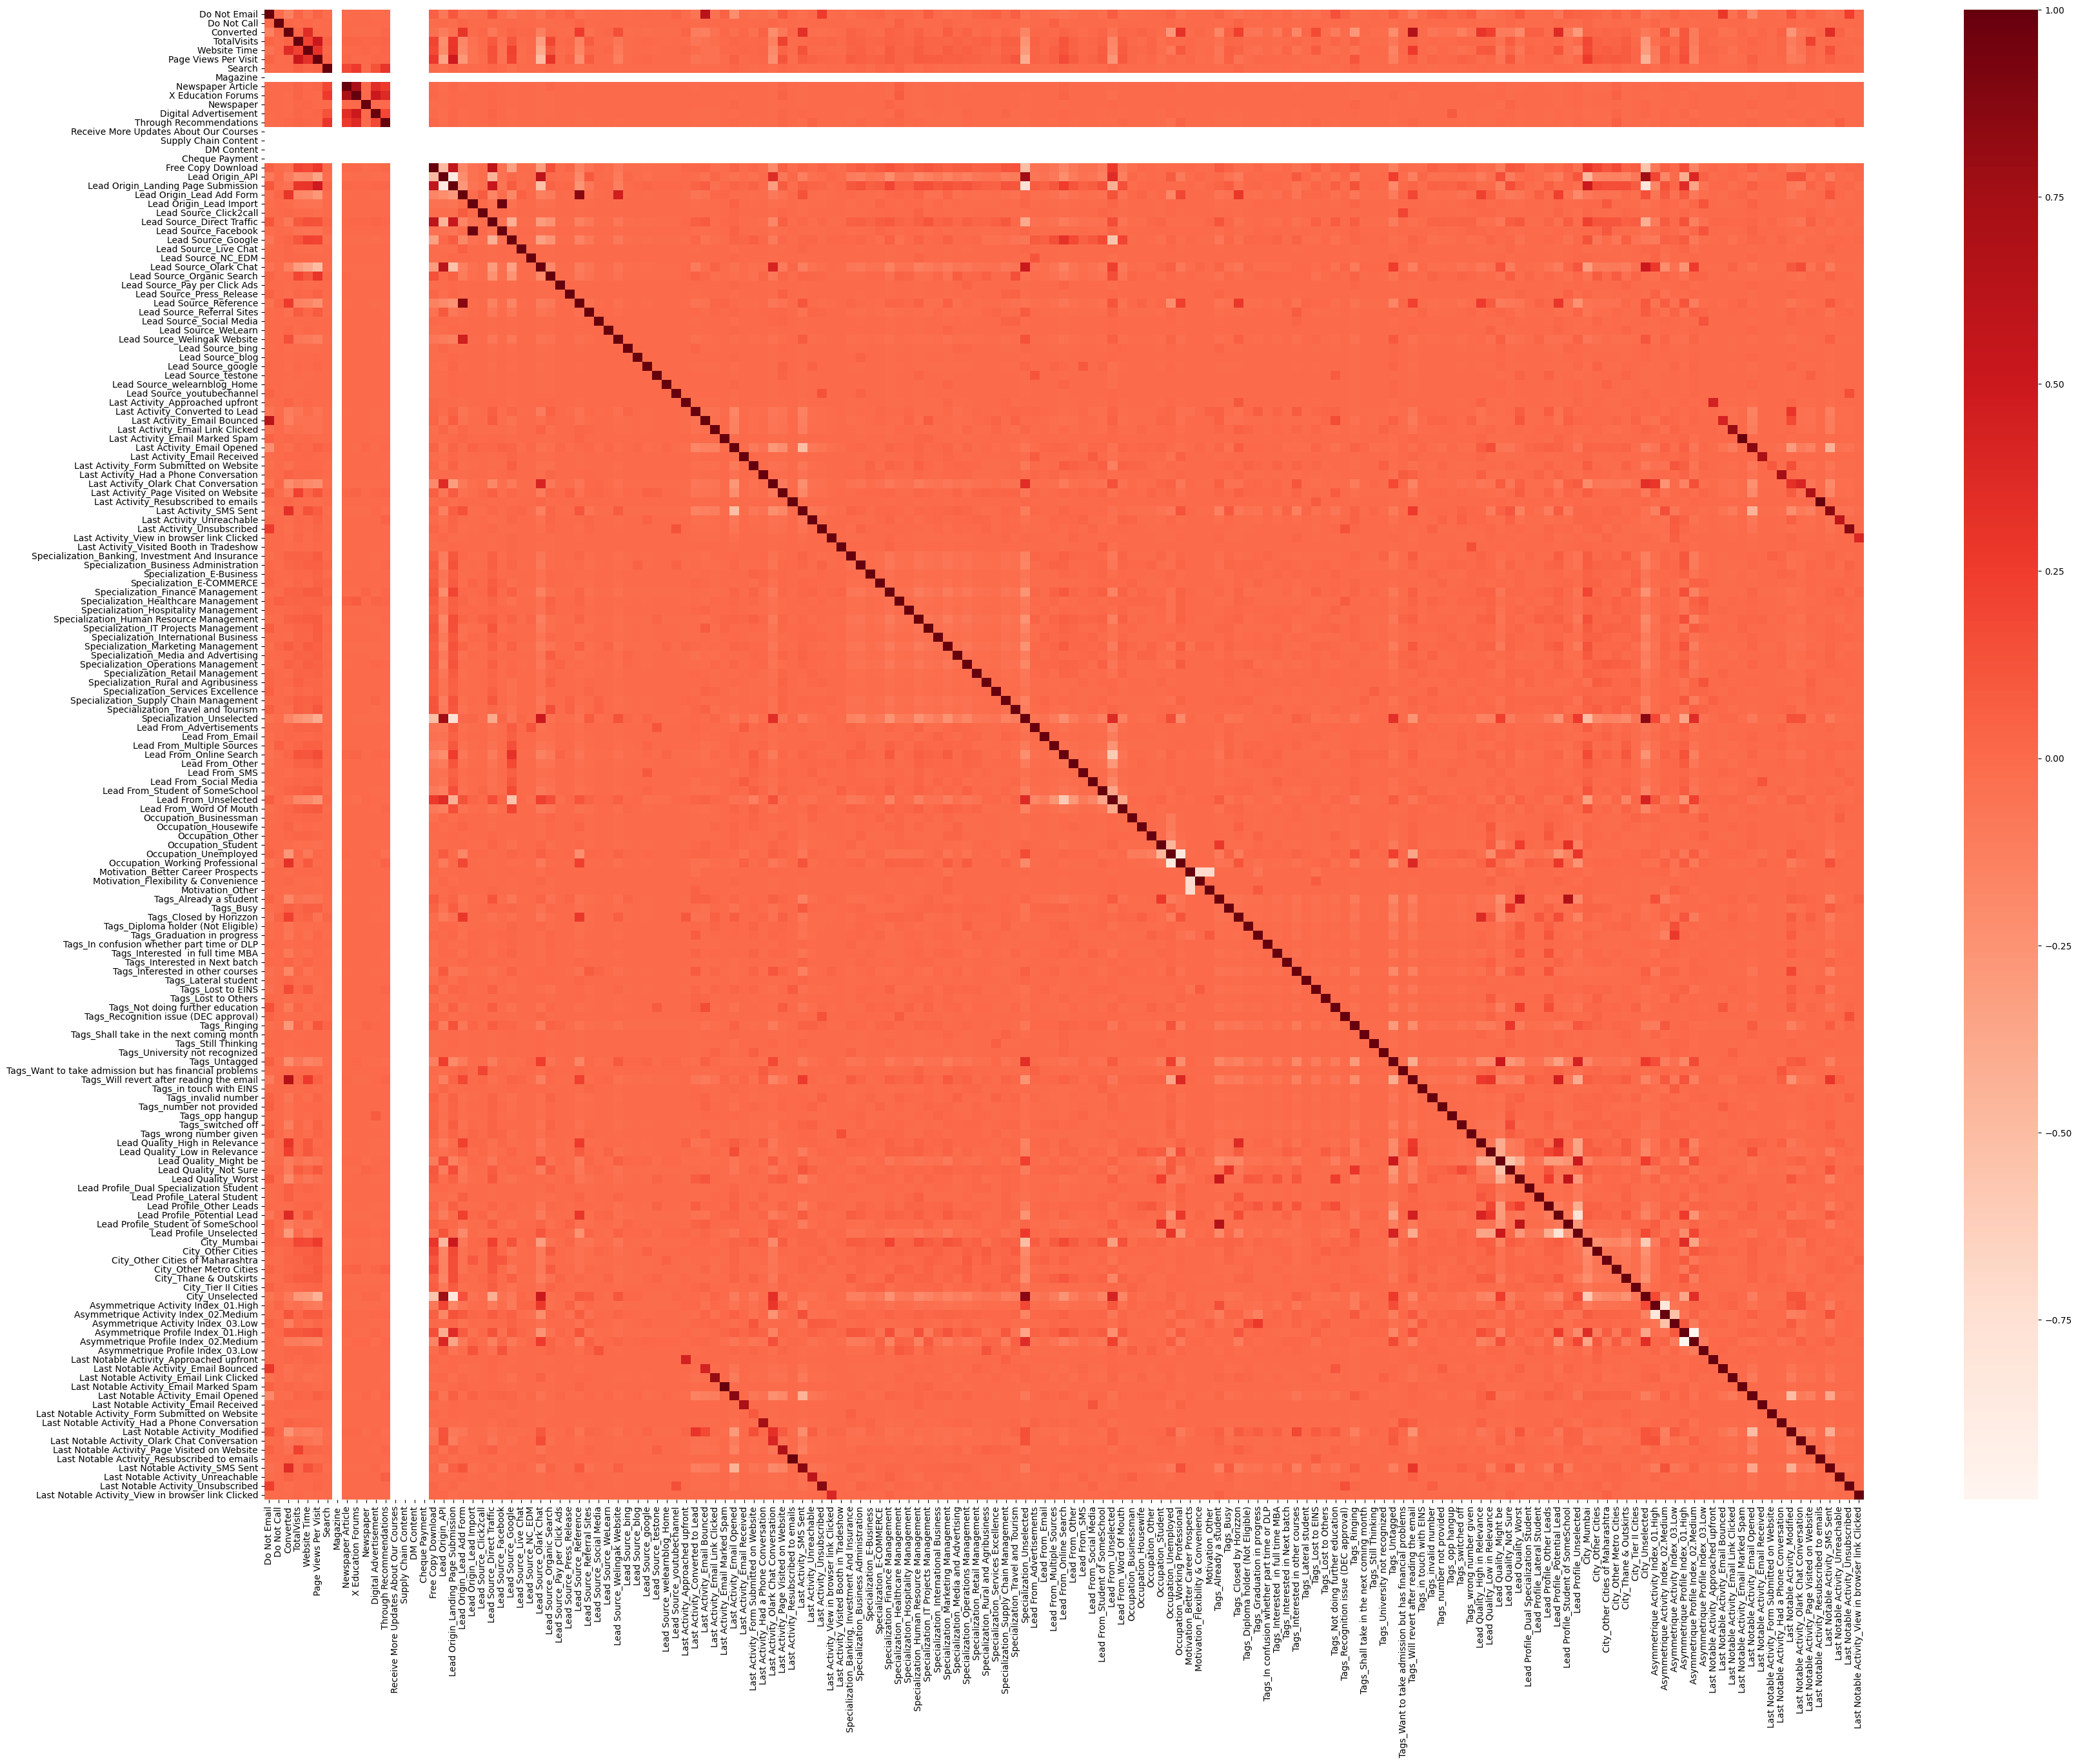

In [70]:
plt.figure(figsize=(40,30))
sns.heatmap(leads.corr(), cmap='Reds')
plt.show()

In [71]:
## From the above heatmap, we cannot determine correlation between variables, as the number of variables is huge

In [72]:
## We will now find highly correlated feature variables directly using corr() function and drop the ones correlated beyond the threshold of 75% from leads dataframe
## At the same time, we will ignore the diagonal of the correlation matrix using np.eye, to avoid dropping variables due to self-matching


m = ~(leads.corr().mask(np.eye(len(leads.corr()), dtype=bool)).abs() > 0.75).any()

final_corr_matrix = leads.corr().loc[m, m]

leads = leads[final_corr_matrix.columns]

leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Website Time,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
660728,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
660681,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
## Now we are left with 137 columns in the leads dataframe

In [74]:
## Let's look for outliers in the dataset...

## We will check 2 columns... TotalVisits and Website Time

<function matplotlib.pyplot.show(close=None, block=None)>

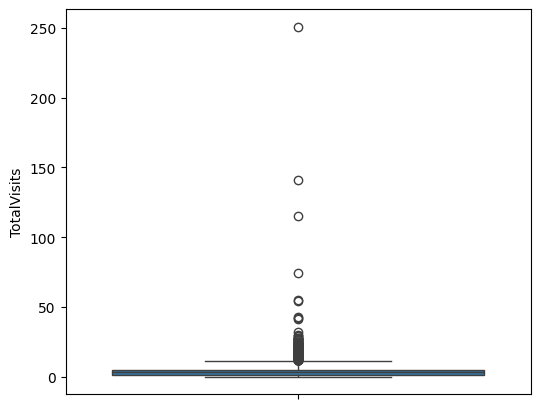

In [75]:
## 1: TotalVisits

plt.figure(figsize=(6, 5))
sns.boxplot(leads['TotalVisits'])
plt.show

In [76]:
## Let's check percentiles of data in TotalVisits

leads['TotalVisits'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [77]:
## From the above, we can clearly see outliers in the data

## Besides, from the above analysis, we can safely say that we can ignore the data of any individual who has visited the website more than 17 times, since below that is where 99 percentile of the data lies

## Let's delete rows having TotalVisits more than 17

leads.drop(leads[leads['TotalVisits']>17].index, inplace=True)

leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 660737 to 579533
Columns: 137 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(135)
memory usage: 9.5 MB


<function matplotlib.pyplot.show(close=None, block=None)>

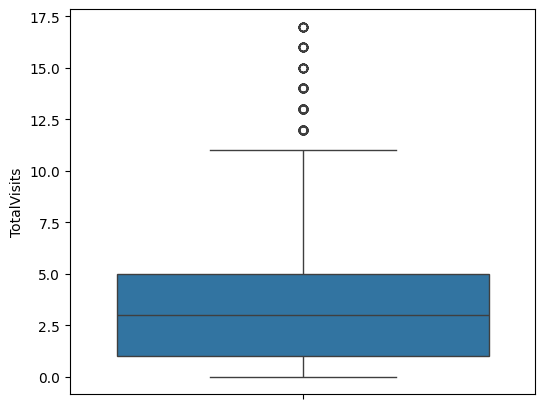

In [78]:
## Plotting TotalVisits again...

plt.figure(figsize=(6, 5))
sns.boxplot(leads['TotalVisits'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

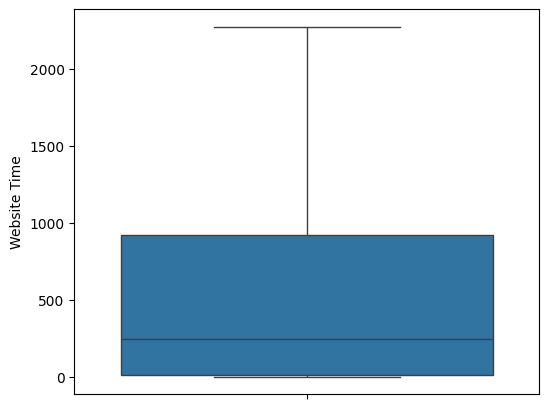

In [79]:
## Let's look at the second column in question for outliers - 'Website Time'

## 2. Website Time

plt.figure(figsize=(6, 5))
sns.boxplot(leads['Website Time'])
plt.show

In [80]:
## This column doesn't have any outliers

## Now we can proceed to the next step, which is Test-Train Splitting of data...

### STEP 5: TEST-TRAIN SPLITTING OF DATASET

In [81]:
## Importing library

from sklearn.model_selection import train_test_split

In [82]:
## Copying only independent variables to X dataframe
X = leads.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Website Time,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
660681,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [83]:
## Target variable will go to y datafram

y = leads['Converted']

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [84]:
## Splitting dataset into X_train, X_test, y_train and y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### STEP 6: FEATURE SCALING

In [85]:
leads.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Website Time,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.0,8991.000000,8991.0,...,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,0.077744,0.000222,0.378045,3.217106,481.305973,2.344587,0.001446,0.0,0.000111,0.0,...,0.000111,0.006562,0.000111,0.000111,0.001446,0.361473,0.020242,0.032143,0.003559,0.000111
std,0.267784,0.014914,0.484926,2.989530,544.883763,2.061548,0.037999,0.0,0.010546,0.0,...,0.010546,0.080745,0.010546,0.010546,0.037999,0.480454,0.140836,0.176390,0.059555,0.010546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,245.000000,2.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,919.500000,3.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,17.000000,2272.000000,16.000000,1.000000,0.0,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
## We will use StandardScaler to scale 3 feature variables - 'TotalVisits', 'Website Time' and 'Page Views Per Visit'

## Importing library...

from sklearn.preprocessing import StandardScaler


## Scaling variables...

scaler = StandardScaler()

X_train[['TotalVisits','Website Time','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Website Time','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Website Time,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
644758,0,0,0.246579,0.764873,0.777363,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
659411,0,0,0.908719,-0.148599,0.298183,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
589511,0,0,2.564067,-0.649536,-0.554758,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609752,0,0,-1.077699,-0.881587,-1.139357,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
622916,0,0,-1.077699,-0.881587,-1.139357,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
## Let's check lead conversion rate now...

lead_conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
lead_conversion

37.80447113780447

In [88]:
## Lead conversion rate is approximately 37.8%

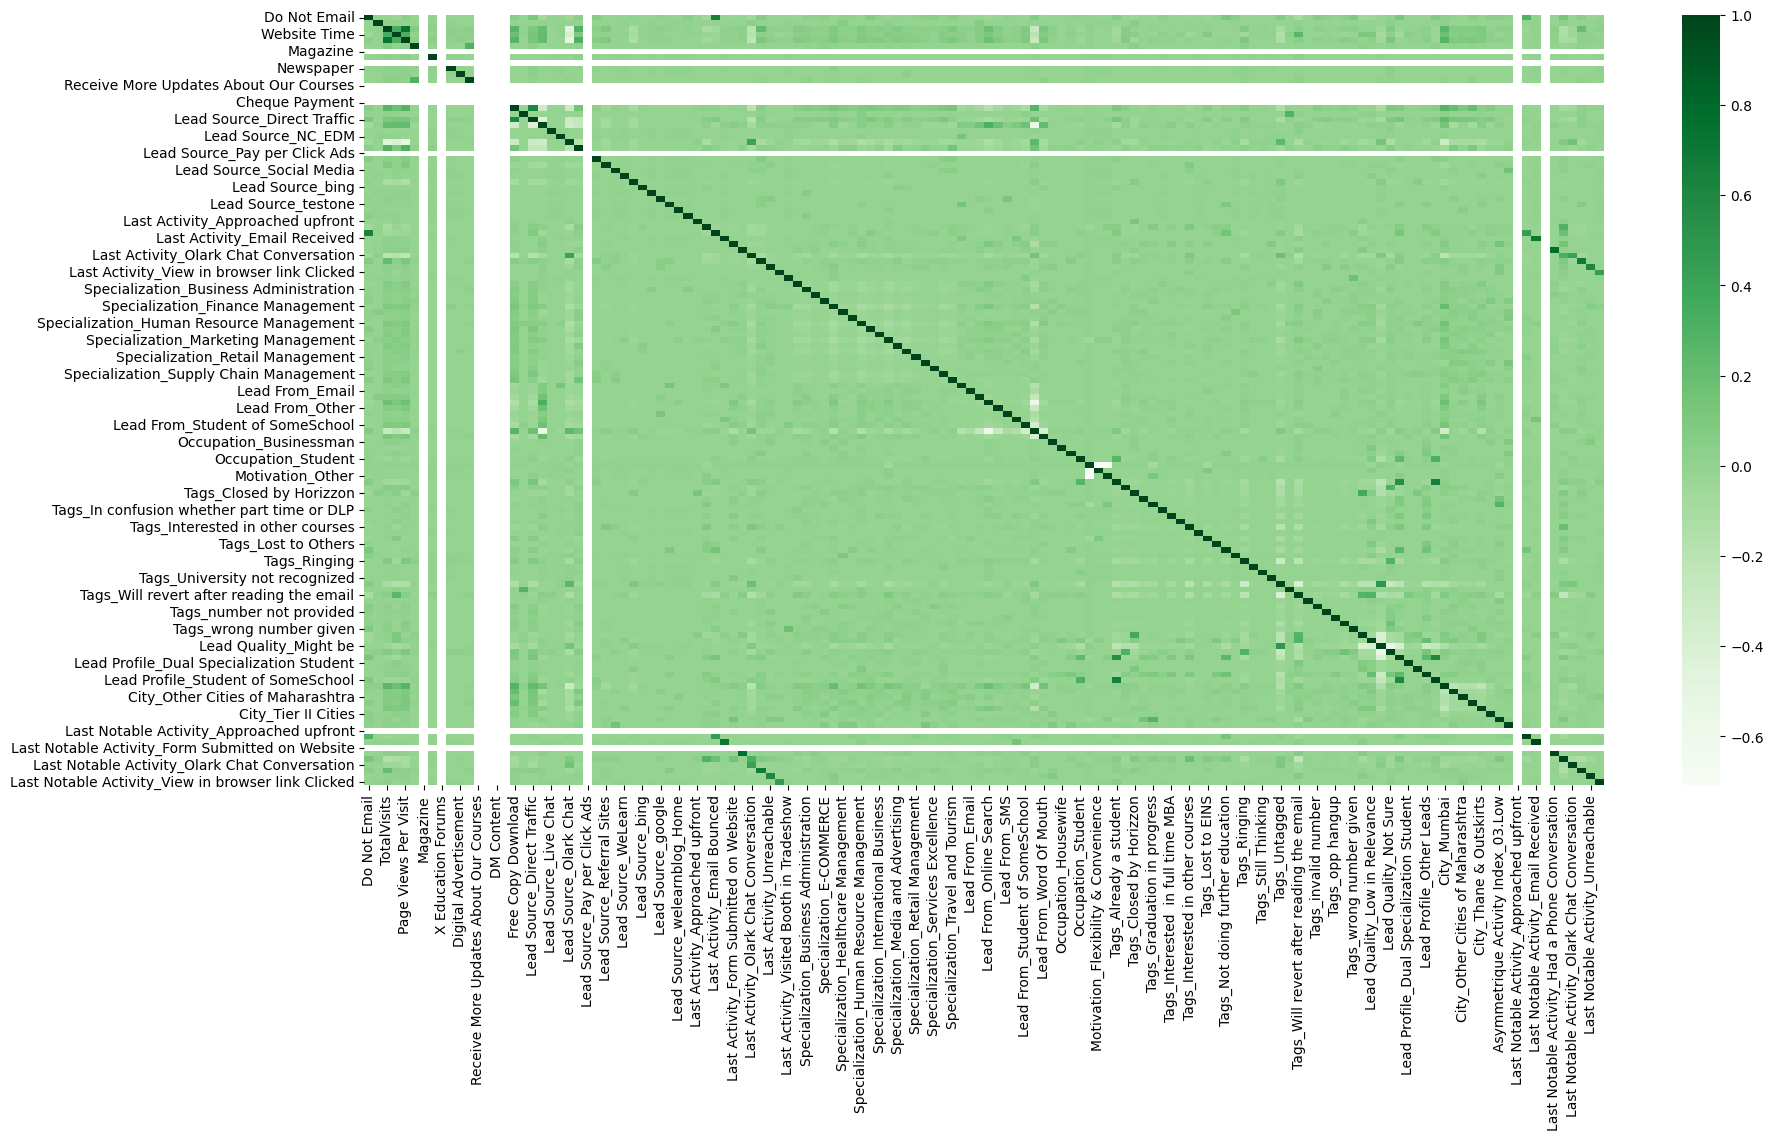

In [89]:
## Checking correlation between feature variables in X_train...

plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(), cmap='Greens')
plt.show()

### STEP 7: BUILDING LOGISTIC REGRESSION MODEL FOR PREDICTING LEAD SCORES

In [90]:
## Building and running Model # 1

In [91]:
import statsmodels.api as sm

log_model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6169
Model Family:                Binomial   Df Model:                          123
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Apr 2024   Deviance:                       59315.
Time:                        23:04:15   Pearson chi2:                 2.90e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   9.378e+26   2.09e+20   4.48e+06      0.000    9.38e+26    9.38e+26
Do Not Email                                           -9.948e+13   4.24e+06  -2.35e+07      0.000   -9.95e+13   -9.95e+13
Do Not Call                                             3.881e+15    4.8e+07   8.09e+07      0.000    3.88e+15    3.88e+15
TotalVisits                                             5.035e+13    1.4e+06   3.61e+07      0.000    5.03e+13    5.03e+13
Website Time                                            1.509e+14   1.03e+06   1.46e+08      0.000    1.51e+14    1.51e+14
Page Views Per Visit                                   -2.248e+13   1.44e+06  -1.56e+07      0.000   -2.25e+13   -2.25e+13
Search                                                 -4.277e+14   2.14e+07  -1.99e+07      0.000   -4.28e+14   -4.28e+14
Magazine                                                 1.96e+24   4.38e+17   4.48e+06      0.000    1.96e+24    1.96e+24
Newspaper Article                                       4.327e+15   6.73e+07   6.43e+07      0.000    4.33e+15    4.33e+15
X Education Forums                                      3.607e+23   8.05e+16   4.48e+06      0.000    3.61e+23    3.61e+23
Newspaper                                              -3.565e+15   6.75e+07  -5.28e+07      0.000   -3.56e+15   -3.56e+15
Digital Advertisement                                  -5.335e+14   4.77e+07  -1.12e+07      0.000   -5.33e+14   -5.33e+14
Through Recommendations                                 7.744e+14   3.54e+07   2.19e+07      0.000    7.74e+14    7.74e+14
Receive More Updates About Our Courses                  1.829e+23   4.09e+16   4.48e+06      0.000    1.83e+23    1.83e+23
Supply Chain Content                                    2.529e+24   5.65e+17   4.48e+06      0.000    2.53e+24    2.53e+24
DM Content                                             -1.714e+22   3.83e+15  -4.48e+06      0.000   -1.71e+22   -1.71e+22
Cheque Payment                                         -6.385e+22   1.43e+16  -4.48e+06      0.000   -6.39e+22   -6.39e+22
Free Copy Download                                      4.287e+12   3.38e+06   1.27e+06      0.000    4.29e+12    4.29e+12
Lead Source_Click2call                                  1.395e+15   3.54e+07   3.94e+07      0.000     1.4e+15     1.4e+15
Lead Source_Direct Traffic                              1.697e+14    5.4e+06   3.14e+07      0.000     1.7e+14     1.7e+14
Lead Source_Google                                      1.296e+14   5.26e+06   2.46e+07      0.000     1.3e+14     1.3e+14
Lead Source_Live Chat                                   3.729e+15   4.77e+07   7.81e+07      0.000    3.73e+15    3.73e+15
Lead Sou

In [92]:
## Since we have a huge list of feature variables, we will use automated feature selection

## We will use RFE for the same

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [94]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=40)  ## 40 features to select
rfe = rfe.fit(X_train, y_train)

In [95]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('Do Not Call', False, 29),
 ('TotalVisits', False, 33),
 ('Website Time', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Search', False, 62),
 ('Magazine', False, 92),
 ('Newspaper Article', False, 69),
 ('X Education Forums', False, 94),
 ('Newspaper', False, 14),
 ('Digital Advertisement', False, 75),
 ('Through Recommendations', False, 77),
 ('Receive More Updates About Our Courses', False, 97),
 ('Supply Chain Content', False, 90),
 ('DM Content', False, 96),
 ('Cheque Payment', False, 95),
 ('Free Copy Download', False, 8),
 ('Lead Source_Click2call', False, 47),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 70),
 ('Lead Source_NC_EDM', False, 52),
 ('Lead Source_Olark Chat', False, 18),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 93),
 ('Lead Source_Press_Release', False, 22),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Med

In [97]:
## Creating first list of features...

feature_set_1 = X_train.columns[rfe.support_]

In [98]:
feature_set_1

Index(['Website Time', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_blog',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Hospitality Management', 'Lead From_Multiple Sources',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch',
       'Tags_Interested in other courses', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Still Thinking', 'Tags_Untagged',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags

In [99]:
## Now let's create logistic regression Model # 2...

X_train_sm = sm.add_constant(X_train[feature_set_1])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1287.9
Date:                Mon, 08 Apr 2024   Deviance:                       2575.8
Time:                        23:04:35   Pearson chi2:                 7.64e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5995
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.5820      0.427     -1.362      0.173      -1.420       0.256
Website Time                                      1.2117      0.062     19.465      0.000       1.090       1.334
Lead Source_Direct Traffic                       -1.5434      0.169     -9.124      0.000      -1.875      -1.212
Lead Source_Google                               -1.2372      0.153     -8.066      0.000      -1.538      -0.937
Lead Source_Organic Search                       -1.2021      0.191     -6.292      0.000      -1.577      -0.828
Lead Source_Referral Sites                       -1.3677      0.478     -2.859      0.004      -2.305      -0.430
Lead Source_Welingak Website                      5.0724      1.018      4.983      0.000       3.077       7.068
Lead Source_blog                                -26.4313   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_google                              -24.0860   1.03e+05     -0.000      1.000   -2.02e+05    2.02e+05
Last Activity_Converted to Lead                  -1.0149      0.370     -2.746      0.006      -1.739      -0.291
Last Activity_Email Bounced                      -1.9013      0.462     -4.114      0.000      -2.807      -0.995
Last Activity_Olark Chat Conversation            -1.0906      0.274     -3.976      0.000      -1.628      -0.553
Last Activity_Page Visited on Website            -0.9414      0.242     -3.889      0.000      -1.416      -0.467
Specialization_Hospitality Management            -0.7018      0.494     -1.420      0.156      -1.670       0.267
Lead From_Multiple Sources                       -0.7107      0.387     -1.834      0.067      -1.470       0.049
Tags_Already a student                           -3.3491      1.111     -3.015      0.003      -5.526      -1.172
Tags_Busy                                         1.2629      0.459      2.752      0.006       0.363       2.162
Tags_Closed by Horizzon                           6.7142      0.834      8.053      0.000       5.080       8.348
Tags_Diploma holder (Not Eligible)               -2.2577      1.209     -1.867      0.062      -4.627       0.112
Tags_Interested  in full time MBA                -1.9888      0.885     -2.246      0.025      -3.724      -0.253
Tags_Interested in Next batch                    26.1971   1.15e+05      0.000      1.000   -2.26e+05    2.26e+05
Tags_Interested in other courses                 -1.2833      0.521     -2.462      0.014      -2.305      -0.262
Tags_Lateral student                             27.8690    1.5e+05      0.000      1.000   -2.95e+05    2.95e+05
Tags_Lost to EINS                                 6.8843      0.771      8.932      0.000       5.374       8.395
Tags_

In [100]:
## Let's remove features for which probability value is high (significance is low)...

## So in the next feature set, we will remove 'Lead Source_blog', 'Lead Source_google', 'Tags_Interested in Next batch', 'Tags_Lateral student',
## 'Tags_invalid number', 'Tags_number not provided' and 'Tags_wrong number given'

## Besides, we also need to remove feature 'Last Activity_Converted to Lead', which essentially means that the conversion has happened already
## Considering this feature will be counter-productive to prediction power of the model, so let's drop that as well

In [101]:
X_train.columns[rfe.support_]

Index(['Website Time', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_blog',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Hospitality Management', 'Lead From_Multiple Sources',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch',
       'Tags_Interested in other courses', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Still Thinking', 'Tags_Untagged',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags

In [102]:
## Creating second list of features...

feature_set_2 = ['Website Time', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Hospitality Management', 'Lead From_Multiple Sources',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Still Thinking', 'Tags_Untagged',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS', 'Tags_switched off',
       'Lead Quality_High in Relevance',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Student of SomeSchool',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation']

In [103]:
## Now let's create logistic regression Model # 3...

X_train_sm = sm.add_constant(X_train[feature_set_2])
log_model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6260
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1315.5
Date:                Mon, 08 Apr 2024   Deviance:                       2631.0
Time:                        23:04:35   Pearson chi2:                 7.06e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5959
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2655      0.339     -3.735      0.000      -1.930      -0.601
Website Time                                      1.2043      0.061     19.701      0.000       1.084       1.324
Lead Source_Direct Traffic                       -1.5954      0.168     -9.522      0.000      -1.924      -1.267
Lead Source_Google                               -1.2579      0.152     -8.302      0.000      -1.555      -0.961
Lead Source_Organic Search                       -1.2083      0.188     -6.437      0.000      -1.576      -0.840
Lead Source_Referral Sites                       -1.3983      0.474     -2.948      0.003      -2.328      -0.469
Lead Source_Welingak Website                      5.0825      1.018      4.991      0.000       3.087       7.078
Last Activity_Email Bounced                      -1.8088      0.458     -3.945      0.000      -2.707      -0.910
Last Activity_Olark Chat Conversation            -0.9546      0.270     -3.538      0.000      -1.483      -0.426
Last Activity_Page Visited on Website            -0.9000      0.238     -3.787      0.000      -1.366      -0.434
Specialization_Hospitality Management            -0.6789      0.487     -1.395      0.163      -1.633       0.275
Lead From_Multiple Sources                       -0.6807      0.387     -1.759      0.079      -1.439       0.078
Tags_Already a student                           -2.6175      1.081     -2.421      0.015      -4.736      -0.499
Tags_Busy                                         2.0740      0.376      5.522      0.000       1.338       2.810
Tags_Closed by Horizzon                           7.4563      0.801      9.307      0.000       5.886       9.027
Tags_Diploma holder (Not Eligible)               -1.5374      1.184     -1.299      0.194      -3.858       0.783
Tags_Interested  in full time MBA                -1.2330      0.841     -1.465      0.143      -2.882       0.416
Tags_Interested in other courses                 -0.5317      0.454     -1.172      0.241      -1.421       0.358
Tags_Lost to EINS                                 7.6168      0.738     10.327      0.000       6.171       9.062
Tags_Not doing further education                 -0.7576      1.081     -0.701      0.483      -2.877       1.362
Tags_Ringing                                     -1.7087      0.372     -4.596      0.000      -2.437      -0.980
Tags_Still Thinking                               2.9305      1.687      1.738      0.082      -0.375       6.236
Tags_Untagged                                     1.6987      0.330      5.152      0.000       1.052       2.345
Tags_Will revert after reading the email          6.1506      0.365     16.835      0.000       5.435       6.867
Tags_

In [104]:
## Let's remove 6 more features for which probability value is still high (significance is low)...

## We will now remove 'Specialization_Hospitality Management', 'Tags_Diploma holder (Not Eligible)', 'Tags_Interested in full time MBA', 'Tags_Interested in other courses', 'Tags_Not doing further education' and 'Lead Profile_Student of SomeSchool'

In [105]:
## Creating third list of features...

feature_set_3 = ['Website Time', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Lead From_Multiple Sources',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Still Thinking', 'Tags_Untagged',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS', 'Tags_switched off',
       'Lead Quality_High in Relevance',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation']

In [106]:
## Now let's create logistic regression Model # 4...

X_train_sm = sm.add_constant(X_train[feature_set_3])
log_model4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6266
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1319.0
Date:                Mon, 08 Apr 2024   Deviance:                       2638.1
Time:                        23:04:35   Pearson chi2:                 7.03e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5955
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6919      0.256     -6.605      0.000      -2.194      -1.190
Website Time                                      1.1959      0.061     19.682      0.000       1.077       1.315
Lead Source_Direct Traffic                       -1.5891      0.167     -9.519      0.000      -1.916      -1.262
Lead Source_Google                               -1.2663      0.151     -8.365      0.000      -1.563      -0.970
Lead Source_Organic Search                       -1.2019      0.187     -6.418      0.000      -1.569      -0.835
Lead Source_Referral Sites                       -1.4032      0.472     -2.970      0.003      -2.329      -0.477
Lead Source_Welingak Website                      5.0818      1.018      4.990      0.000       3.086       7.078
Last Activity_Email Bounced                      -1.8139      0.457     -3.968      0.000      -2.710      -0.918
Last Activity_Olark Chat Conversation            -0.9475      0.269     -3.521      0.000      -1.475      -0.420
Last Activity_Page Visited on Website            -0.9150      0.238     -3.850      0.000      -1.381      -0.449
Lead From_Multiple Sources                       -0.6598      0.386     -1.710      0.087      -1.416       0.096
Tags_Already a student                           -2.2938      1.055     -2.175      0.030      -4.361      -0.227
Tags_Busy                                         2.4808      0.315      7.866      0.000       1.863       3.099
Tags_Closed by Horizzon                           7.8662      0.772     10.187      0.000       6.353       9.380
Tags_Lost to EINS                                 7.9810      0.683     11.682      0.000       6.642       9.320
Tags_Ringing                                     -1.2844      0.307     -4.184      0.000      -1.886      -0.683
Tags_Still Thinking                               3.3564      1.664      2.017      0.044       0.094       6.619
Tags_Untagged                                     2.1220      0.245      8.674      0.000       1.642       2.601
Tags_Will revert after reading the email          6.5544      0.292     22.474      0.000       5.983       7.126
Tags_in touch with EINS                           2.9884      0.878      3.404      0.001       1.267       4.709
Tags_switched off                                -2.3414      0.770     -3.039      0.002      -3.851      -0.832
Lead Quality_High in Relevance                    1.4944      0.509      2.937      0.003       0.497       2.491
Lead Quality_Not Sure                             1.1521      0.242      4.758      0.000       0.677       1.627
Lead Quality_Worst                               -1.5826      0.724     -2.185      0.029      -3.002      -0.163
Asymm

In [107]:
## Let's remove 4 more features for which probability value is still high (significance is low)...

## We will now remove 'Lead From_Multiple Sources', 'Tags_Already a student', 'Tags_Still Thinking' and 'Lead Quality_Worst'

In [108]:
## Creating fourth list of features...

feature_set_4 = ['Website Time', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Untagged',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS', 'Tags_switched off',
       'Lead Quality_High in Relevance',
       'Lead Quality_Not Sure',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation']

In [109]:
## Now let's create logistic regression Model # 5...

X_train_sm = sm.add_constant(X_train[feature_set_4])
log_model5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6270
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1333.0
Date:                Mon, 08 Apr 2024   Deviance:                       2665.9
Time:                        23:04:35   Pearson chi2:                 7.50e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5937
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.2311      0.234     -9.518      0.000      -2.691      -1.772
Website Time                                      1.1793      0.060     19.673      0.000       1.062       1.297
Lead Source_Direct Traffic                       -1.6001      0.166     -9.664      0.000      -1.925      -1.276
Lead Source_Google                               -1.2582      0.150     -8.386      0.000      -1.552      -0.964
Lead Source_Organic Search                       -1.1560      0.187     -6.193      0.000      -1.522      -0.790
Lead Source_Referral Sites                       -1.3402      0.471     -2.846      0.004      -2.263      -0.417
Lead Source_Welingak Website                      5.0836      1.018      4.992      0.000       3.088       7.079
Last Activity_Email Bounced                      -1.8611      0.465     -4.004      0.000      -2.772      -0.950
Last Activity_Olark Chat Conversation            -0.9551      0.269     -3.549      0.000      -1.483      -0.428
Last Activity_Page Visited on Website            -0.9406      0.237     -3.968      0.000      -1.405      -0.476
Tags_Busy                                         2.8225      0.312      9.038      0.000       2.210       3.435
Tags_Closed by Horizzon                           8.2874      0.768     10.787      0.000       6.782       9.793
Tags_Lost to EINS                                 8.2726      0.663     12.482      0.000       6.974       9.572
Tags_Ringing                                     -0.8794      0.302     -2.908      0.004      -1.472      -0.287
Tags_Untagged                                     2.6399      0.224     11.769      0.000       2.200       3.080
Tags_Will revert after reading the email          7.0349      0.277     25.411      0.000       6.492       7.577
Tags_in touch with EINS                           3.4727      0.874      3.973      0.000       1.760       5.186
Tags_switched off                                -2.0162      0.770     -2.620      0.009      -3.525      -0.508
Lead Quality_High in Relevance                    1.6523      0.521      3.173      0.002       0.632       2.673
Lead Quality_Not Sure                             1.3445      0.244      5.513      0.000       0.866       1.822
Asymmetrique Activity Index_03.Low               -2.0156      0.421     -4.792      0.000      -2.840      -1.191
Last Notable Activity_Modified                   -1.4246      0.136    -10.457      0.000      -1.692      -1.158
Last Notable Activity_Olark Chat Conversation    -1.5261      0.495     -3.085      0.002      -2.496      -0.557
=================================================================================================================
"""

In [110]:
## Now significance of all remaining features seems high

In [111]:
# Getting predicted values on the train set...

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
644758    0.988429
659411    0.029147
589511    0.988247
609752    0.347301
622916    0.347301
653473    0.990340
642914    0.113496
638855    0.036959
597222    0.347301
658481    0.016198
dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9884294 , 0.02914707, 0.98824729, 0.34730094, 0.34730094,
       0.99034039, 0.11349568, 0.03695915, 0.34730094, 0.01619792])

In [113]:
## Now let's create a dataframe with conversion flag and predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number
0,1,0.988429,644758
1,0,0.029147,659411
2,1,0.988247,589511
3,1,0.347301,609752
4,0,0.347301,622916


In [114]:
## Adding a new column to this dataframe... 'Lead Score', which will be equal to Conversion_Probability X 100

y_train_pred_final['Lead Score'] = y_train_pred_final.Conversion_Probability * 100

y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number,Lead Score
0,1,0.988429,644758,98.842940
1,0,0.029147,659411,2.914707
2,1,0.988247,589511,98.824729
3,1,0.347301,609752,34.730094
4,0,0.347301,622916,34.730094


In [115]:
## We need one more column - 'Conversion_Predicted', with threshold of 0.5 on 'Conversion_Probability' column, so that we can measure the performance of this model

y_train_pred_final['Conversion_Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number,Lead Score,Conversion_Predicted
0,1,0.988429,644758,98.842940,1
1,0,0.029147,659411,2.914707,0
2,1,0.988247,589511,98.824729,1
3,1,0.347301,609752,34.730094,0
4,0,0.347301,622916,34.730094,0


### STEP 8: ROC CURVE AND DETERMINATION OF OPTIMUM CUT-OFF FOR PREDICTIONS

In [116]:
## Writing function to draw ROC curve...

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
## Let's import metrics library from sklearn...

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

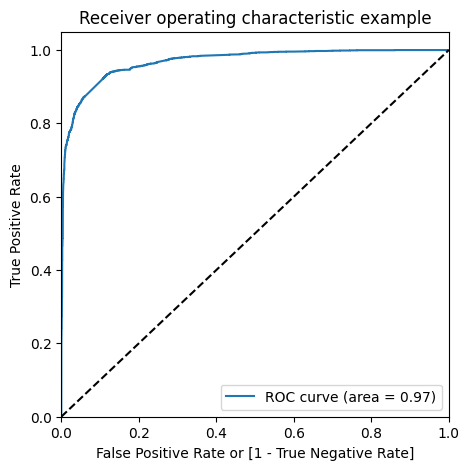

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

In [119]:
## ROC Curve looks good, as it is very far from the 45-degree diagonal

## Now, let's find optimal cut-off point for balanced sensitivity and specificity

## For that, we need columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number,Lead Score,Conversion_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.988429,644758,98.842940,1,1,1,1,1,1,1,1,1,1,1
1,0,0.029147,659411,2.914707,0,1,0,0,0,0,0,0,0,0,0
2,1,0.988247,589511,98.824729,1,1,1,1,1,1,1,1,1,1,1
3,1,0.347301,609752,34.730094,0,1,1,1,1,0,0,0,0,0,0
4,0,0.347301,622916,34.730094,0,1,1,1,1,0,0,0,0,0,0


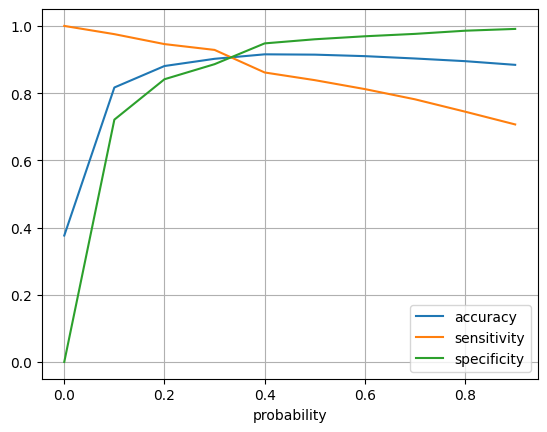

In [120]:
# We also need to calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

## Plotting cutoff matrix...

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.grid()
plt.show()

In [121]:
## From the above plot, probability of 0.33 seems to be the optimum cutoff, where all three - accuracy, sensitivity and specificity meet perfectly

## We will use this cutoff - 0.33 - for further analysis

## So, let's reset 'Conversion_Probability' of y_train_pred_final dataframe using new cutoff...

y_train_pred_final['Conversion_Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number,Lead Score,Conversion_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.988429,644758,98.842940,1,1,1,1,1,1,1,1,1,1,1
1,0,0.029147,659411,2.914707,0,1,0,0,0,0,0,0,0,0,0
2,1,0.988247,589511,98.824729,1,1,1,1,1,1,1,1,1,1,1
3,1,0.347301,609752,34.730094,1,1,1,1,1,0,0,0,0,0,0
4,0,0.347301,622916,34.730094,1,1,1,1,1,0,0,0,0,0,0


### STEP 9: MODEL PERFORMANCE ASSESSMENT ON TRAIN SET

In [122]:
## To assess the performance of this model further, we need to calculate a few metrics..


In [123]:
# Building confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Conversion_Predicted )
print(confusion)

[[3502  424]
 [ 183 2184]]


In [124]:
      # Predicted     not_converted    converted
# Actual
# not_converted             3502      424
# converted                 183       2184

In [125]:
# Overall accuracy of the model...

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Conversion_Predicted))

0.9035436198951216


In [126]:
## Let's check VIFs of feature variables...

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[feature_set_3].columns
vif['VIF'] = [variance_inflation_factor(X_train[feature_set_3].values, i) for i in range(X_train[feature_set_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Google,2.37
1,Lead Source_Direct Traffic,2.27
16,Tags_Untagged,2.17
24,Last Notable Activity_Modified,2.12
7,Last Activity_Olark Chat Conversation,1.88
17,Tags_Will revert after reading the email,1.71
22,Lead Quality_Worst,1.70
14,Tags_Ringing,1.65
10,Tags_Already a student,1.57
3,Lead Source_Organic Search,1.54


#### All variables have good VIFs, so we don't need to drop any of them

In [127]:
## Let's calculate more metrics for the model...

true_positives = confusion[1,1]
true_negatives = confusion[0,0]
false_positives = confusion[0,1]
false_negatives = confusion[1,0]

In [128]:
## Let's check sensitivity of the model

sensitivity = true_positives / float (true_positives + false_negatives)

sensitivity

0.9226869455006337

In [129]:
## Sensitivity is good.. let's look at specificity...


specificity = true_negatives / float(true_negatives + false_positives)

specificity

0.8920020376974019

In [130]:
## specificity is also good.. let's look at precision...

from sklearn.metrics import precision_score

print(precision_score(y_train_pred_final.Converted, y_train_pred_final.Conversion_Predicted))

0.8374233128834356


In [131]:
## precision_score is also good.. let's look at recall...

from sklearn.metrics import recall_score

print(recall_score(y_train_pred_final.Converted, y_train_pred_final.Conversion_Predicted))

0.9226869455006337


### STEP 10: MODEL EVALUATION ON TEST DATASET

In [132]:
X_test[['TotalVisits','Website Time','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Website Time','Page Views Per Visit']])

In [133]:
## Keeping on selected features in X_test dataset...

X_test = X_test[feature_set_4]
X_test.head()

,Website Time,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Tags_Busy,...,Tags_Ringing,Tags_Untagged,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Not Sure,Asymmetrique Activity Index_03.Low,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
Lead Number,,,,,,,,,,,,,,,,,,,,,
583508,-0.321717,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
602755,-0.881587,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
610025,-0.098874,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
612148,0.704098,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
579744,-0.745303,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [134]:
## Adding constant for regression model...

X_test_sm = sm.add_constant(X_test)

In [135]:
## Making predictions on the test dataset...

y_test_pred = res.predict(X_test_sm)

In [136]:
y_test_pred[:10]

Lead Number
583508    0.489091
602755    0.977336
610025    0.212839
612148    0.833440
579744    0.000172
626676    0.040179
633484    0.975022
627291    0.016012
590900    0.998136
601636    0.023578
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Let's see head
y_pred_1.head()

,0
Lead Number,
583508,0.489091
602755,0.977336
610025,0.212839
612148,0.833440
579744,0.000172


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,583508,0.489091
1,1,602755,0.977336
2,1,610025,0.212839
3,1,612148,0.833440
4,0,579744,0.000172


In [144]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Probability'})

In [145]:
## Considering threshold of 0.33, as found with earlier analysis

y_pred_final['Conversion_Predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.33 else 0)

In [146]:
y_pred_final.head()

,Converted,Lead Number,Conversion_Probability,Conversion_Predicted
0,0,583508,0.489091,1
1,1,602755,0.977336,1
2,1,610025,0.212839,0
3,1,612148,0.833440,1
4,0,579744,0.000172,0


In [147]:
## Let's check accuracy on test dataset

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Conversion_Predicted)

0.9077094143810229

In [148]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Conversion_Predicted )
confusion2

array([[1483,  183],
       [  66,  966]])

In [149]:
## Let's calculate more metrics on test dataset...

true_positives2 = confusion2[1,1]
true_negatives2 = confusion2[0,0]
false_positives2 = confusion2[0,1]
false_negatives2 = confusion2[1,0]

In [150]:
## Let's check sensitivity of the model

sensitivity2 = true_positives2 / float (true_positives2 + false_negatives2)

sensitivity2

0.936046511627907

In [151]:
## Sensitivity is good.. let's look at specificity...


specificity2 = true_negatives2 / float(true_negatives2 + false_positives2)

specificity2

0.89015606242497

In [152]:
## specificity is also good.. let's look at precision and recall, both together...

from sklearn.metrics import precision_score, recall_score

print('Precision = ', precision_score(y_pred_final.Converted, y_pred_final.Conversion_Predicted))

print('Recall = ', recall_score(y_pred_final.Converted, y_pred_final.Conversion_Predicted))

Precision =  0.8407310704960835
Recall =  0.936046511627907


In [153]:
## Finally, we will add 'Lead Score' column in the test prediction dataset...

pd.options.display.float_format = '{:,.2f}'.format

y_pred_final['Lead Score'] = y_pred_final['Conversion_Probability'].astype('float64') * 100

y_pred_final.head()

,Converted,Lead Number,Conversion_Probability,Conversion_Predicted,Lead Score
0,0,583508,0.49,1,48.91
1,1,602755,0.98,1,97.73
2,1,610025,0.21,0,21.28
3,1,612148,0.83,1,83.34
4,0,579744,0.00,0,0.02


In [154]:
y_pred_final

,Converted,Lead Number,Conversion_Probability,Conversion_Predicted,Lead Score
0,0,583508,0.49,1,48.91
1,1,602755,0.98,1,97.73
2,1,610025,0.21,0,21.28
3,1,612148,0.83,1,83.34
4,0,579744,0.00,0,0.02
...,...,...,...,...,...
2693,0,650907,0.20,0,20.36
2694,1,621941,0.19,0,19.25
2695,0,592711,0.04,0,3.66
2696,0,647127,0.32,0,32.09


### PRINTING THE FINAL MODEL SUMMARY AGAIN

In [155]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6270
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1333.0
Date:                Mon, 08 Apr 2024   Deviance:                       2665.9
Time:                        23:04:38   Pearson chi2:                 7.50e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5937
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.2311      0.234     -9.518      0.000      -2.691      -1.772
Website Time                                      1.1793      0.060     19.673      0.000       1.062       1.297
Lead Source_Direct Traffic                       -1.6001      0.166     -9.664      0.000      -1.925      -1.276
Lead Source_Google                               -1.2582      0.150     -8.386      0.000      -1.552      -0.964
Lead Source_Organic Search                       -1.1560      0.187     -6.193      0.000      -1.522      -0.790
Lead Source_Referral Sites                       -1.3402      0.471     -2.846      0.004      -2.263      -0.417
Lead Source_Welingak Website                      5.0836      1.018      4.992      0.000       3.088       7.079
Last Activity_Email Bounced                      -1.8611      0.465     -4.004      0.000      -2.772      -0.950
Last Activity_Olark Chat Conversation            -0.9551      0.269     -3.549      0.000      -1.483      -0.428
Last Activity_Page Visited on Website            -0.9406      0.237     -3.968      0.000      -1.405      -0.476
Tags_Busy                                         2.8225      0.312      9.038      0.000       2.210       3.435
Tags_Closed by Horizzon                           8.2874      0.768     10.787      0.000       6.782       9.793
Tags_Lost to EINS                                 8.2726      0.663     12.482      0.000       6.974       9.572
Tags_Ringing                                     -0.8794      0.302     -2.908      0.004      -1.472      -0.287
Tags_Untagged                                     2.6399      0.224     11.769      0.000       2.200       3.080
Tags_Will revert after reading the email          7.0349      0.277     25.411      0.000       6.492       7.577
Tags_in touch with EINS                           3.4727      0.874      3.973      0.000       1.760       5.186
Tags_switched off                                -2.0162      0.770     -2.620      0.009      -3.525      -0.508
Lead Quality_High in Relevance                    1.6523      0.521      3.173      0.002       0.632       2.673
Lead Quality_Not Sure                             1.3445      0.244      5.513      0.000       0.866       1.822
Asymmetrique Activity Index_03.Low               -2.0156      0.421     -4.792      0.000      -2.840      -1.191
Last Notable Activity_Modified                   -1.4246      0.136    -10.457      0.000      -1.692      -1.158
Last Notable Activity_Olark Chat Conversation    -1.5261      0.495     -3.085      0.002      -2.496      -0.557
=================================================================================================================
"""